In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline 
Event_df = pd.read_csv('logs1516.csv')
Event_df.sort_values(by=["Time"], ascending=True)
M_df = pd.read_csv('M_results1516.csv')
S_df = pd.read_csv('S_results1516.csv')

In [3]:
#AverageScore
Ave_score = pd.merge(M_df,S_df,on="Full name")
Ave_score["Ave_score"] = Ave_score.apply(lambda x: (x["M_score"] + x ["S_score"] )/2, axis=1)
#Ave_score

In [4]:
#Merge with ScoreTable
Event_df_merge = pd.merge(Event_df,Ave_score,on="Full name")
Event_df_merge =Event_df_merge[["Full name","Ave_score"]].drop_duplicates(['Full name', 'Ave_score'])
Event_df_merge = Event_df_merge.sort_values(by=["Full name"], ascending=True).reset_index( drop = True )
Event_df_merge = Event_df_merge.set_index("Full name")
#Event_df_merge

In [5]:
#Counting the number of clicks on login schreen of a specific cource
Clicks = Event_df[Event_df["Event context"].str.contains("Course: BAMS1001: Foundations in Health and Disease")&Event_df["Event name"].str.contains("Course viewed")]
Clicks = Clicks["Event context"].groupby(Clicks["Full name"])
Event_df_merge["Clicks"] = Clicks.count()

In [6]:
#Export into Excel File in order to see a whole data 
writer = pd.ExcelWriter('Clicks.xlsx')
Event_df_merge.to_excel(writer,'Sheet1')
#writer.save()

(array([  1.,   0.,   1.,   2.,   9.,   8.,  16.,  14.,   9.,   4.]),
 array([ 23.165 ,  30.2485,  37.332 ,  44.4155,  51.499 ,  58.5825,
         65.666 ,  72.7495,  79.833 ,  86.9165,  94.    ]),
 <a list of 10 Patch objects>)

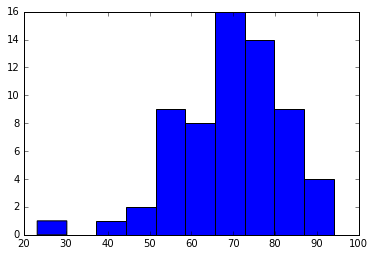

In [7]:
#Histgram to see average socre and clicks
plt.hist(list(Event_df_merge["Ave_score"]))

(array([  6.,   9.,  12.,  14.,  10.,   4.,   5.,   1.,   2.,   1.]),
 array([ 103.,  155.,  207.,  259.,  311.,  363.,  415.,  467.,  519.,
         571.,  623.]),
 <a list of 10 Patch objects>)

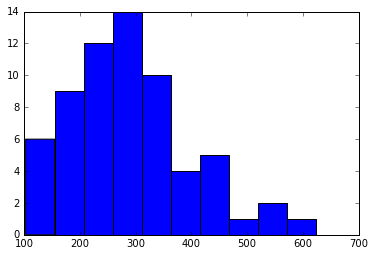

In [8]:
plt.hist(list(Event_df_merge["Clicks"]))

#Event_df_merge
#list(Event_df_merge["Clicks"])
#Event_df_merge.plot

[ 0.01816639]
63.944759682
0.025398959584
[ 0.15937051]


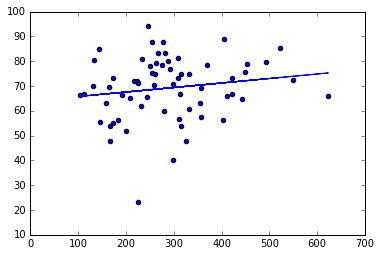

In [9]:
#Single linear regression
# sklearn.linear_model.LinearRegression class
from sklearn import linear_model
clf = linear_model.LinearRegression()
 
# Explanatory variable: "Clicks" 
X = Event_df_merge.loc[:, ['Clicks']].as_matrix()
 
# Objectitve variable: "Ave_score" 
Y = Event_df_merge['Ave_score'].as_matrix()
 
# Create predicitive model
clf.fit(X, Y)
 
# Regression coefficient 
print(clf.coef_)
 
# Intercept
print(clf.intercept_)
 
# Coefficient of determination
print(clf.score(X, Y))

#Scatter plot（diagram）
plt.scatter(X, Y)
 
#Regression Liner
plt.plot(X, clf.predict(X))

var = lambda item: sum([(i-sum(item)/len(item))**2 for i in item]) / len(item)
cov = lambda item1, item2: sum([(i[0]-sum(item1)/len(item1)) * (i[1]-sum(item2)/len(item2)) for i in zip(item1, item2)]) / len(item1)
r = lambda item1, item2: cov(item1,item2) / (var(item1)**0.5*var(item2)**0.5)
print(r(X,Y))

#scipy.stats.pearsonr(X, Y)

In [10]:
#See whether there is significant differences b/w access frequencies of studnets who took more than average socores and less than 
#T-test  (not equl variance)
import scipy as sp
from scipy import stats

low = Event_df_merge[(Event_df_merge['Clicks']  < 300)].drop(["Ave_score"], axis=1)
high = Event_df_merge[(Event_df_merge['Clicks']  > 300)].drop(["Ave_score"], axis=1)

low = list(low["Clicks"])
high =  list(high["Clicks"])


#Student's t-test 
t,p  = stats.ttest_ind(high, low)
#Welch's t test
wt,wp = stats.ttest_ind(high, low, equal_var = False)

#Student's t-test  outoput
print( "t value: %(t)s" %locals() )
print( "p value:  %(p)s" %locals() )

#Welch's t test output 
print( "t value: %(wt)s" %locals() )
print( "p value:  %(wp)s" %locals() )

t value: 10.1228408518
p value:  9.29007672166e-15
t value: 9.27857187695
p value:  2.96530244221e-11
